In [1]:
import cv2                                         # working with, mainly resizing, images
import numpy as np                                 # dealing with arrays
import os                                          # dealing with directories
from random import shuffle                         # mixing up or currently ordered data that might lead our network astray in training.
from keras.models import Sequential                # creating sequential model of CNN
from keras.layers import Conv2D             # creating convolution layer
from keras.layers import MaxPooling2D              # creating maxpool layer
from keras.layers import Flatten                   # creating input vector for dense layer
from keras.layers import Dense                     # create dense layer or fully connected layer
from keras.layers import Dropout                    # use to avoid overfitting by droping some parameters
from keras.layers import Activation                   # use to avoid overfitting by droping some parameters
from keras.layers import BatchNormalization                   # use to avoid overfitting by droping some parameters
from keras.preprocessing import image              # generate image
import matplotlib.pyplot as plt                    # use for visualization
import warnings#
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from keras.constraints import maxnorm
warnings.filterwarnings('ignore')
import os
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
TRAIN_DIR = 'dataset/training'
TEST_DIR = 'dataset/validation'
IMG_SIZE = 110,110
IMG_SIZE_VAR = 110

In [3]:
image_names = []
data_labels = []
data_images = []

In [4]:
def datasetProcessing(category):
    for index, file in enumerate(os.listdir(os.path.join(TRAIN_DIR, category))):
        if file.lower().endswith("JPG") | file.lower().endswith("jpeg") | file.lower().endswith("png"):
            image_names.append(os.path.join(TRAIN_DIR,category,file))
            data_labels.append(category)
            img = cv2.imread(os.path.join(TRAIN_DIR,category,file))
            im = cv2.resize(img,IMG_SIZE)

            data_images.append(im)
        else:
            continue

    for index, file in enumerate(os.listdir(os.path.join(TEST_DIR, category))):
        if file.lower().endswith("JPG") | file.lower().endswith("jpeg") | file.lower().endswith("png"):
            image_names.append(os.path.join(TEST_DIR,category,file))
            data_labels.append(category)
            img = cv2.imread(os.path.join(TEST_DIR,category,file))
            im = cv2.resize(img,IMG_SIZE)

            data_images.append(im)
        else:
            continue

In [5]:
datasetProcessing("tambak")
datasetProcessing("mangrove")
datasetProcessing("non-mangrove")

data = np.array(data_images)

In [6]:
data.shape

(252, 110, 110, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
label = le.fit_transform(data_labels)
label_inverse = le.inverse_transform(np.unique(label)).tolist()
label_inverse

['mangrove', 'non-mangrove', 'tambak']

([<matplotlib.axis.XTick at 0x7f54c0c56080>,
 <a list of 3 Text xticklabel objects>)

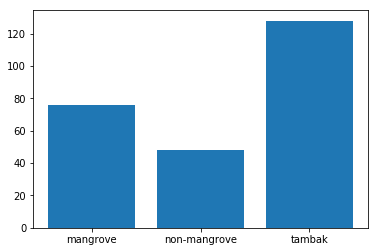

In [8]:
label = pd.DataFrame(label, columns=["val"])
labelx = label_inverse
labelh = [label[label["val"] == 0].count()["val"], label[label["val"] == 1].count()["val"], label[label["val"] == 2].count()["val"]]

plt.bar(x=labelx, height=labelh)
plt.xticks(labelx)

In [9]:
data.shape

(252, 110, 110, 3)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(data,label,test_size=0.20,random_state=42, stratify=label)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train = X_train / 255.0
X_val = X_val / 255.0

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
class_num = y_val.shape[1]

print("X_train shape",X_train.shape)
print("X_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

X_train shape (201, 110, 110, 3)
X_test shape (51, 110, 110, 3)
y_train shape (201, 3)
y_test shape (51, 3)


In [58]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='valid', input_shape=(IMG_SIZE_VAR, IMG_SIZE_VAR, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
    
model.add(Conv2D(128, (3, 3), padding='valid', input_shape=(IMG_SIZE_VAR, IMG_SIZE_VAR, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Flatten(input_shape=(IMG_SIZE_VAR,IMG_SIZE_VAR)))
# model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(3))
model.add(Activation('softmax'))

optimizer = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

History = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Train on 201 samples, validate on 51 samples
Epoch 1/10
201/201 [==============================] - 24s 119ms/step - loss: 1.8960 - acc: 0.5622 - val_loss: 5.5582 - val_acc: 0.4510
Epoch 2/10
201/201 [==============================] - 18s 89ms/step - loss: 0.9498 - acc: 0.7463 - val_loss: 5.0697 - val_acc: 0.5490
Epoch 3/10
201/201 [==============================] - 18s 90ms/step - loss: 0.4138 - acc: 0.8458 - val_loss: 4.9021 - val_acc: 0.5490
Epoch 4/10
201/201 [==============================] - 18s 88ms/step - loss: 0.3381 - acc: 0.8657 - val_loss: 2.2124 - val_acc: 0.6471
Epoch 5/10
201/201 [==============================] - 19s 96ms/step - loss: 0.2659 - acc: 0.9254 - val_loss: 0.6107 - val_acc: 0.8235
Epoch 6/10
201/201 [==============================] - 18s 87ms/step - loss: 0.1770 - acc: 0.9303 - val_loss: 0.6267 - val_acc: 0.8627
Epoch 7/10
201/201 [==============================] - 18s 88ms/step - loss: 0.1476 - acc: 0.9453 - val_loss: 0.6559 - val_acc: 0.8039
Epoch 8/10
201/2

# CAUTIION

In [18]:
# model.save("model_82.h5")
from keras.models import load_model
model = load_model('model_88.h5')

In [19]:
pred = model.predict(X_val)

# Model evaluation
scores = model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print(scores)

Accuracy: 88.24%
[0.31897058148010105, 0.8823529435139076]


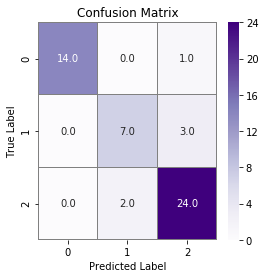

              precision    recall  f1-score   support

    mangrove       1.00      0.93      0.97        15
non-mangrove       0.78      0.70      0.74        10
      tambak       0.86      0.92      0.89        26

   micro avg       0.88      0.88      0.88        51
   macro avg       0.88      0.85      0.86        51
weighted avg       0.88      0.88      0.88        51
 samples avg       0.88      0.88      0.88        51



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val.argmax(axis=1),pred.argmax(axis=1))

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_val, np.around(pred), target_names=label_inverse)
print(report)

In [21]:
testing_label = []
testing_data = []
testing_name = []

testing_dir = "dataset/testing/"

for folder in os.listdir(testing_dir):        
    for index, file in enumerate(os.listdir(os.path.join(testing_dir, folder))):
        if file.lower().endswith("JPG") | file.lower().endswith("jpeg") | file.lower().endswith("png"):
            testing_name.append(os.path.join(testing_dir, folder, file))
            testing_label.append(label_inverse.index(folder))
            img = cv2.imread(os.path.join(testing_dir, folder, file))
            im = cv2.resize(img,IMG_SIZE)
#             im = im.reshape(64,64, 3)
            
            testing_data.append(im)

testing_label = np.array(testing_label)
testing_data = np.array(testing_data)

testing_data = testing_data.astype('float32')
testing_data = testing_data / 255.0

testing_label = np_utils.to_categorical(testing_label)

pred = model.predict(testing_data)

In [22]:
from PIL import ImageFont, ImageDraw, Image

df = pd.DataFrame()
df['file'] = pd.Series(testing_name)
df['true_label'] = pd.Series(testing_label.argmax(axis=1))
df['predicted_label'] = pd.Series(pred.argmax(axis=1))
df['prob'] = pd.Series(np.amax(pred, axis=1))

df

,file,true_label,predicted_label,prob
0,dataset/testing/mangrove/1.A_rotate_270.png,0,0,0.627491
1,dataset/testing/mangrove/1.A_rotate_90.png,0,0,0.649743
2,dataset/testing/mangrove/1.A_rotate_360.png,0,2,0.537568
3,dataset/testing/mangrove/2.B_rotate_270.png,0,0,0.868030
4,dataset/testing/mangrove/2.B_rotate_90.png,0,0,0.825770
5,dataset/testing/mangrove/2.B_rotate_360.png,0,0,0.779673
6,dataset/testing/mangrove/2.B_rotate_180.png,0,0,0.788649
7,dataset/testing/mangrove/1.A_rotate_180.png,0,2,0.645073
8,dataset/testing/non-mangrove/22U_rotate_180.png,1,0,0.606730
9,dataset/testing/non-mangrove/21T_rotate_90.png,1,0,0.431933


In [23]:
testing_series = pd.Series(pred.argmax(axis=1) == testing_label.argmax(axis=1))
print("Accuracy:", testing_series.value_counts()[True] / len(testing_series) * 100)

Accuracy: 64.28571428571429


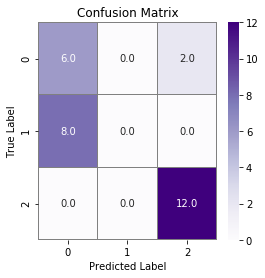

              precision    recall  f1-score   support

           0       0.43      0.75      0.55         8
           2       0.86      1.00      0.92        12

   micro avg       0.64      0.90      0.75        20
   macro avg       0.64      0.88      0.73        20
weighted avg       0.69      0.90      0.77        20



In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(testing_label.argmax(axis=1),pred.argmax(axis=1))

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(testing_label.argmax(axis=1), pred.argmax(axis=1), labels=np.unique(pred.argmax(axis=1)))
print(report)